In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loan Application Status Prediction
## Problem Statement:
### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

#### - Loan_ID

#### - Gender

#### - Married

#### - Dependents

#### - Education

#### - Self_Employed

#### - ApplicantIncome

#### - CoapplicantIncome

#### - Loan_Amount

#### - Loan_Amount_Term

#### - Credit History

#### - Property_Area

#### Dependent Variable (Target Variable):

#### - Loan_Status

#### You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Load the data

In [3]:
data = pd.read_csv("loan_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [317]:
type(data)

pandas.core.frame.DataFrame

In [318]:
# printing the first 5 rows of the dataframe
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [319]:
# printing the number of rows and columns
data.shape

(614, 13)

# Descriptive statistics
## Describing the datasets

In [320]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# checkin for null 
### number of values in each column
data.isnull().sum()

<AxesSubplot:>

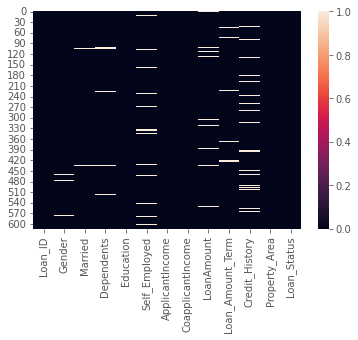

In [321]:
sns.heatmap(data.isnull() )

In [322]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [323]:
# working   out null  values 

In [324]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [325]:
data["Gender"]  = imp_cat.fit_transform(data["Gender"].array.reshape(-1,1))

In [326]:
data["Married"]  = imp_cat.fit_transform(data["Married"].array.reshape(-1,1))

In [327]:
data["Dependents"]  = imp_cat.fit_transform(data["Dependents"].array.reshape(-1,1))

In [328]:
data["Self_Employed"]  = imp_cat.fit_transform(data["Self_Employed"].array.reshape(-1,1))

In [329]:
data["LoanAmount"]  = imp.fit_transform(data["LoanAmount"].array.reshape(-1,1))

In [330]:
data["Loan_Amount_Term"]  = imp.fit_transform(data["Loan_Amount_Term"].array.reshape(-1,1))

In [331]:
data["Credit_History"]  = imp.fit_transform(data["Credit_History"].array.reshape(-1,1))

In [332]:
# number of values in each column
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### all null values have been replaced by mean and mode 

<AxesSubplot:>

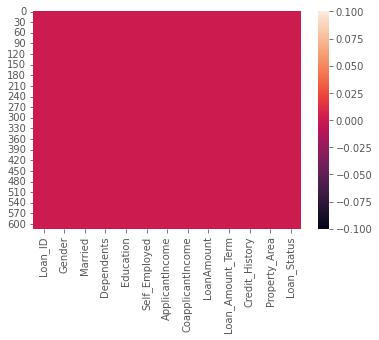

In [333]:
sns.heatmap(data.isnull() )

In [334]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [335]:
# Dependentcolumn values
data["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Visualising the data

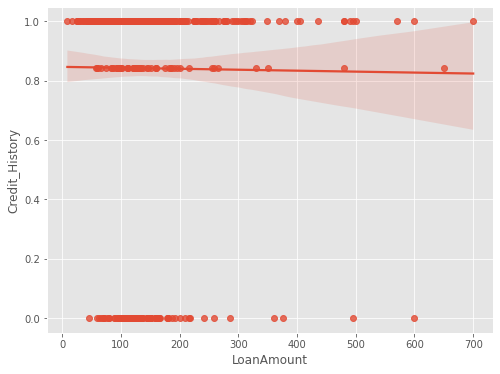

In [336]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = data["LoanAmount"], y = data["Credit_History"])
plt.show()

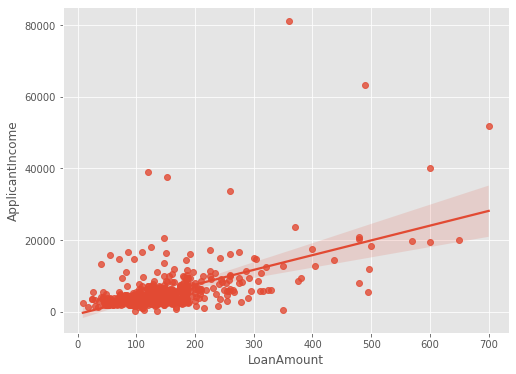

In [337]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = data["LoanAmount"], y = data["ApplicantIncome"])
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

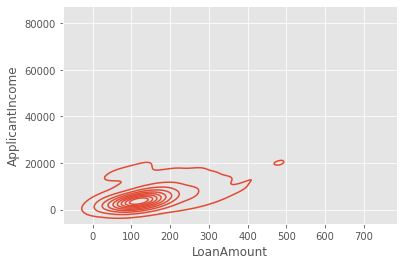

In [338]:
sns.kdeplot(x = data["LoanAmount"], y = data["ApplicantIncome"])

### the density   of data shows that loan amount is mostly concentrate around 0- 400  and the applicant income is concentrated  more around 0-20000

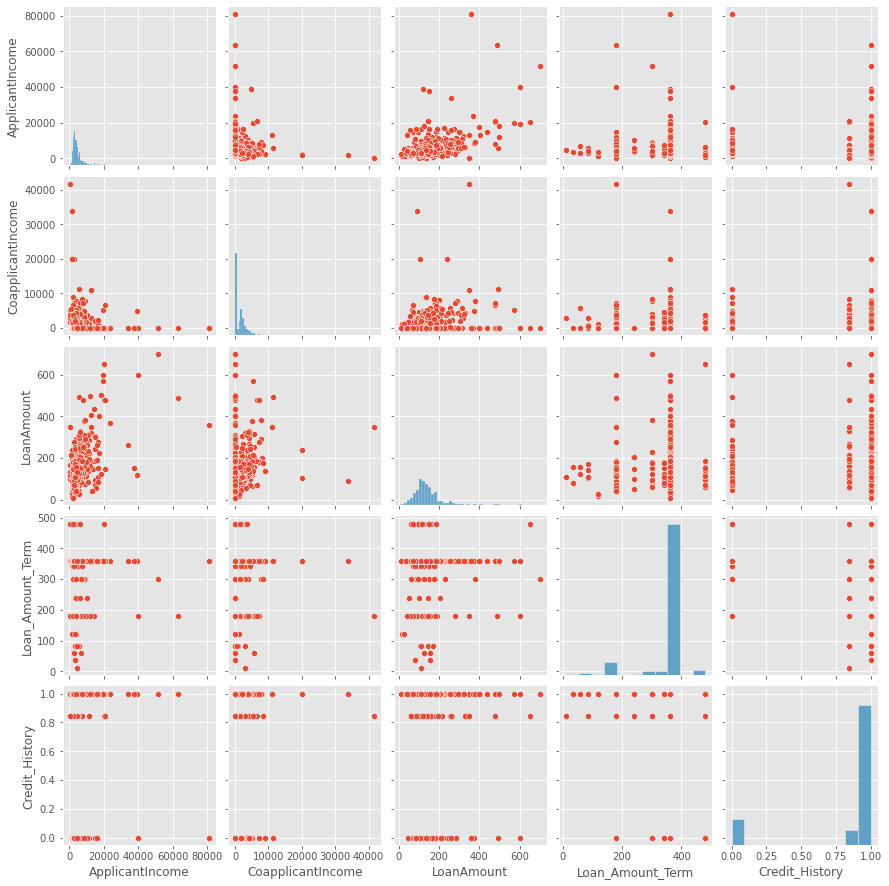

In [339]:
sns.pairplot(data)

<AxesSubplot:xlabel='Education', ylabel='count'>

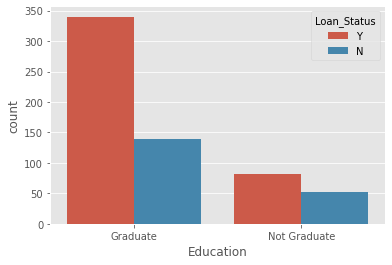

In [340]:
# Education and loan status
sns.countplot(x="Education",hue="Loan_Status",data=data)

#### more applications are from graduate applicants  

<AxesSubplot:xlabel='Married', ylabel='count'>

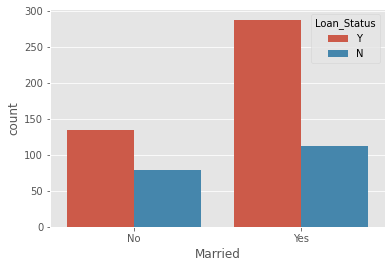

In [341]:
# Marital_status and loan status
sns.countplot(x="Married",hue="Loan_Status",data=data)

### as we can see more applications  for  lone are from married individuals 
#### and they have high approval  state

<AxesSubplot:xlabel='Gender', ylabel='count'>

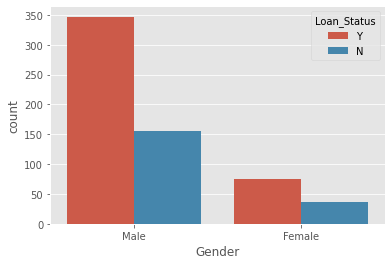

In [342]:
# Gender and loan status
sns.countplot(x="Gender",hue="Loan_Status",data=data)

### most loan applications are approved for males than female 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

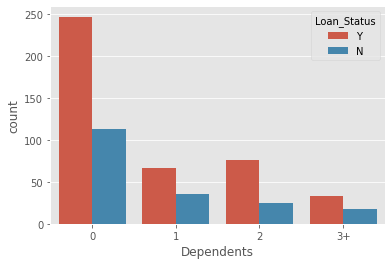

In [343]:
# Dependents and loan status
sns.countplot(x="Dependents",hue="Loan_Status",data=data)

### from the abve graph we  can see that the most applications with 0 dependents are the highest in approval state 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

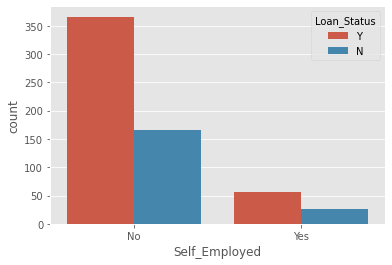

In [344]:
# Self_Employed and loan status
sns.countplot(x="Self_Employed",hue="Loan_Status",data=data)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

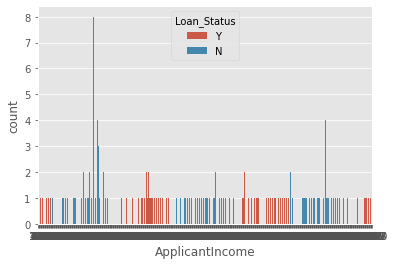

In [345]:
# ApplicantIncome and loan status 
sns.countplot(x="ApplicantIncome",data=data, hue = "Loan_Status")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

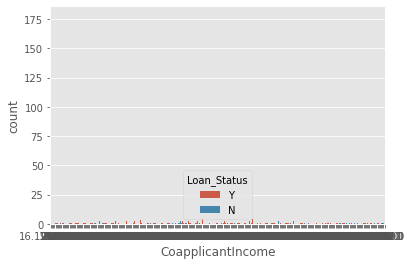

In [346]:
# CoapplicantIncome and loan status
sns.countplot(x="CoapplicantIncome",hue="Loan_Status",data=data)

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

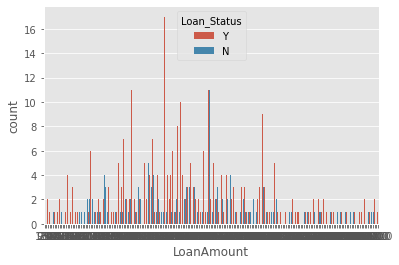

In [347]:
# LoanAmount and loan status
sns.countplot(x="LoanAmount",hue="Loan_Status",data=data)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

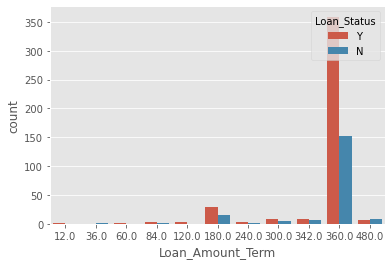

In [348]:
# Loan_Amount_Term and loan status
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

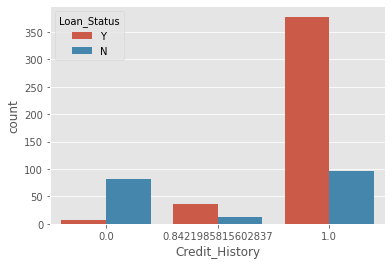

In [349]:
# Credit_History and loan status
sns.countplot(x="Credit_History",hue="Loan_Status",data=data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

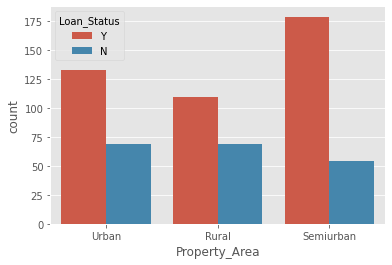

In [350]:
# Property_Area and loan status
sns.countplot(x="Property_Area",hue="Loan_Status",data=data)

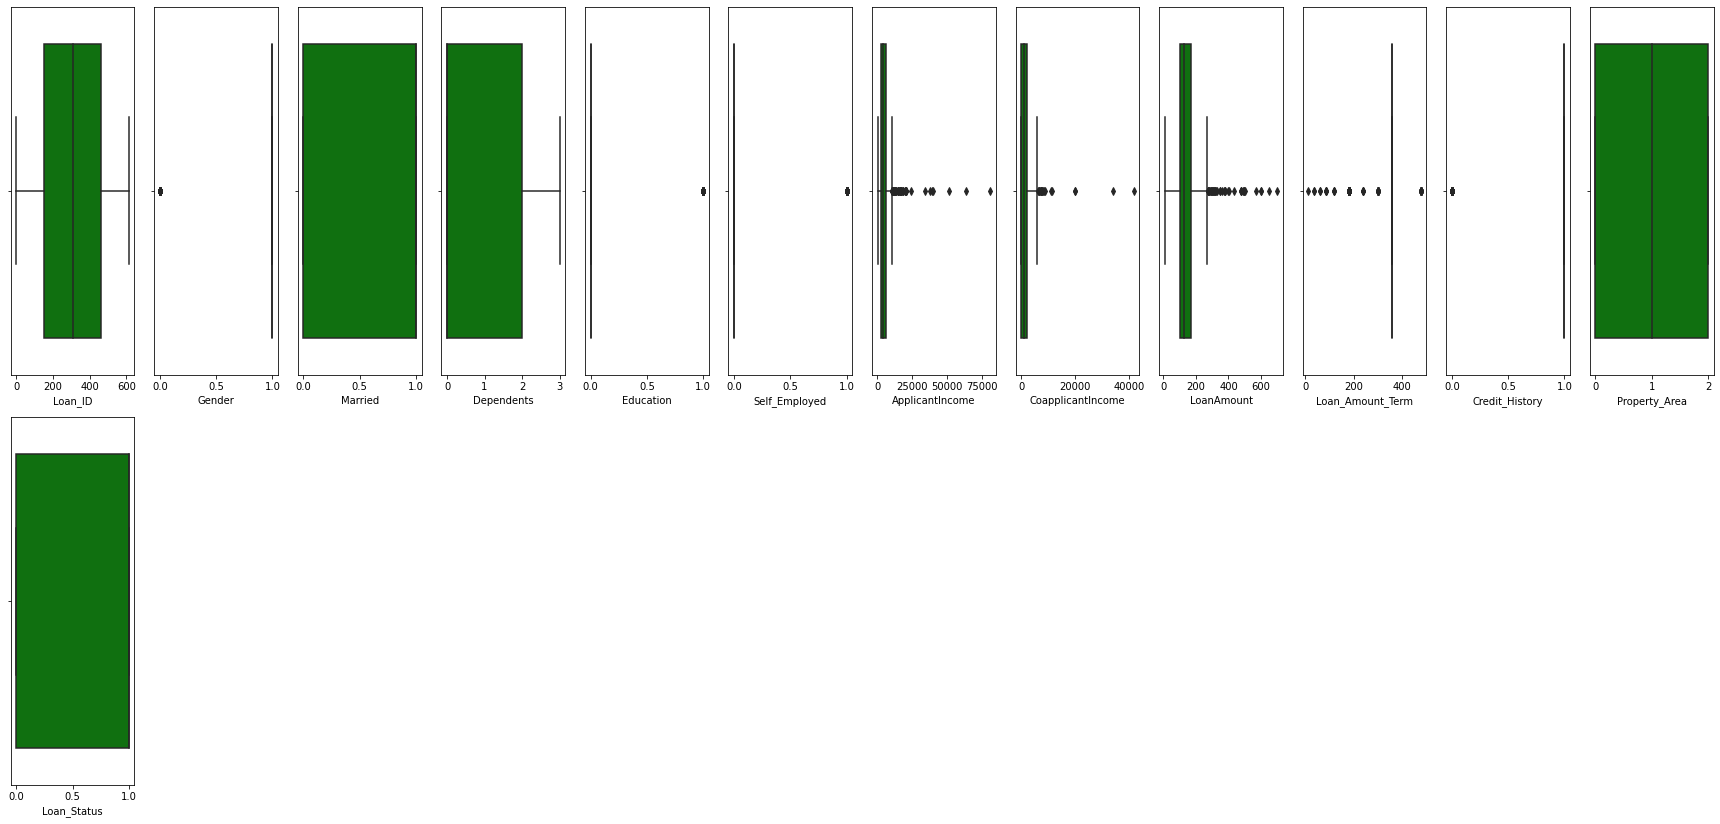

In [9]:
column = data.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

# encoding   data

In [6]:
data
from sklearn .preprocessing import LabelEncoder
LE = LabelEncoder()
data["Loan_Status"] = LE.fit_transform(data["Loan_Status"])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [7]:
from sklearn .preprocessing import OrdinalEncoder
enc =  OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [8]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1


#   checking correlation 

In [354]:
corr = data.corr()

In [355]:
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

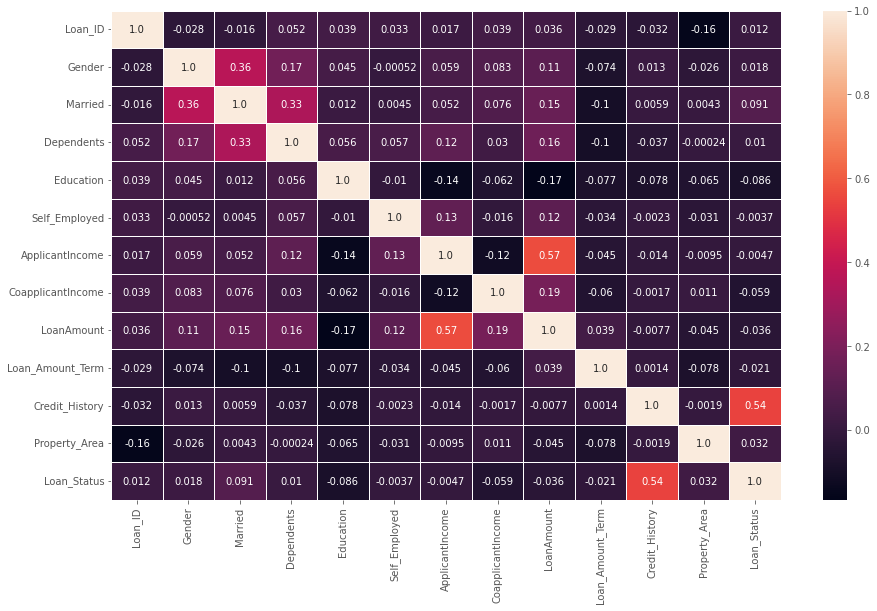

In [358]:
plt.figure(figsize =  (15,9))
sns.heatmap(corr,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

##  as we can see there is   not much correlation  with each other 

# checking skewness

In [360]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [361]:
from sklearn.preprocessing import  power_transform
data["ApplicantIncome"] =  power_transform(data["ApplicantIncome"].array.reshape(-1, 1),method = 'yeo-johnson')

In [362]:
data["CoapplicantIncome"] =  power_transform(data["CoapplicantIncome"].array.reshape(-1, 1),method = 'yeo-johnson')

In [363]:
data["LoanAmount"] =  power_transform(data["LoanAmount"].array.reshape(-1, 1),method = 'yeo-johnson')

In [364]:
data["Loan_Amount_Term"] =  power_transform(data["Loan_Amount_Term"].array.reshape(-1, 1),method = 'yeo-johnson')

In [365]:
data["Credit_History"] =  power_transform(data["Credit_History"].array.reshape(-1, 1),method = 'yeo-johnson')

In [366]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

### skewness of all columns are reduced except the cateorical  columns

In [655]:
# Separating the data and label
x=data.drop(columns=["Loan_ID","Loan_Status"],axis=1) 
y=data["Loan_Status"]

In [656]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,0.544331,-1.102837,0.235387,0.185905,0.514063,2.0
1,1.0,1.0,1.0,0.0,0.0,0.170974,0.750578,-0.037659,0.185905,0.514063,0.0
2,1.0,1.0,0.0,0.0,1.0,-0.499955,-1.102837,-1.346305,0.185905,0.514063,2.0
3,1.0,1.0,0.0,1.0,0.0,-0.743873,0.891686,-0.167886,0.185905,0.514063,2.0
4,1.0,0.0,0.0,0.0,0.0,0.582817,-1.102837,0.158610,0.185905,0.514063,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,-0.554885,-1.102837,-1.205100,0.185905,0.514063,0.0
610,1.0,1.0,3.0,0.0,0.0,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,0.0
611,1.0,1.0,1.0,0.0,0.0,1.023487,0.208603,1.372409,0.185905,0.514063,2.0
612,1.0,1.0,2.0,0.0,0.0,0.931750,-1.102837,0.738924,0.185905,0.514063,2.0


In [657]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [658]:
from sklearn.decomposition import PCA

In [659]:
pca = PCA(8)

In [660]:
x = pca.fit_transform(x)

In [661]:
data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# over sampling to balance   output

In [662]:
from imblearn.over_sampling import SMOTE

In [663]:
smt =  SMOTE()


In [664]:
x_train,y_train  = smt.fit_resample(x,y)

In [665]:
y_train.value_counts()


1    422
0    422
Name: Loan_Status, dtype: int64

In [666]:
x = x_train
y  = y_train

In [667]:
x.shape

(844, 8)

In [668]:
y.shape

(844,)

# scaling data

In [598]:

from sklearn.preprocessing  import StandardScaler

In [599]:
sc = StandardScaler()

In [600]:
x = sc.fit_transform(x)

In [601]:
x

array([[ 6.89550608e-01, -1.08946041e+00,  3.68040909e-01, ...,
         1.34064782e-01,  1.57770724e-03, -1.41799927e+00],
       [-1.49760891e-02, -1.83611417e-01, -7.20585929e-01, ...,
         9.63454013e-02, -7.75375444e-01, -2.08673077e-01],
       [-5.98136697e-01, -1.27322662e+00,  3.90256193e-01, ...,
        -1.42031789e+00, -1.30585997e+00,  2.22186075e+00],
       ...,
       [-2.65094766e-02,  7.00634361e-02, -1.79892708e+00, ...,
         1.48935005e+00,  3.53933342e-01,  5.02606361e-01],
       [ 7.70777881e-01,  9.87996374e-01,  1.61709265e+00, ...,
        -2.00263650e+00,  5.84972562e-01, -3.10319983e-01],
       [-6.70577439e-01,  2.00463280e+00, -4.28928995e-01, ...,
         1.65386498e+00,  1.82466593e-01, -1.01752096e+00]])

# Train Test split 

In [669]:
from sklearn.linear_model import LogisticRegression

In [670]:
lr =  LogisticRegression()

In [676]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  


In [645]:
c

at random state 0 model preforms best
at random_state =   0
training score at 0 is  71.1864406779661
 testing  score is  0 is 70.07874015748031 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  72.54237288135593
 testing  score is  1 is 68.89763779527559 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  71.1864406779661
 testing  score is  2 is 71.65354330708661 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  70.33898305084746
 testing  score is  3 is 72.04724409448819 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  71.52542372881356
 testing  score is  4 is 71.25984251968504 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  72.03389830508475
 testing  score is  5 is 70.86614173228347 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  70.84745762711864
 testing  score is

 testing  score is  68 is 68.50393700787401 

at random state 69 model preforms best
at random_state =   69
training score at 69 is  70.33898305084746
 testing  score is  69 is 71.65354330708661 

at random state 70 model preforms best
at random_state =   70
training score at 70 is  72.20338983050848
 testing  score is  70 is 73.62204724409449 

at random state 71 model preforms best
at random_state =   71
training score at 71 is  71.86440677966101
 testing  score is  71 is 68.50393700787401 

at random state 72 model preforms best
at random_state =   72
training score at 72 is  73.05084745762713
 testing  score is  72 is 69.29133858267717 

at random state 73 model preforms best
at random_state =   73
training score at 73 is  71.35593220338983
 testing  score is  73 is 70.07874015748031 

at random state 74 model preforms best
at random_state =   74
training score at 74 is  72.54237288135593
 testing  score is  74 is 69.68503937007874 

at random state 75 model preforms best
at random

In [647]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=98)  
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  0.7271186440677966
accuracy for  testing  0.6850393700787402


# Training the model using Support Vector Machine Model

In [648]:
# SVC represents Support Vector Classifier
classifier=svm.SVC(kernel='rbf')

In [649]:
# Training the support vector machine model using the function fit
classifier.fit(x_train,y_train)

SVC()

# Model evaluation 

In [650]:
# accuracy score on training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [651]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7830508474576271


In [652]:
# accuracy score on training data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [653]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7125984251968503


# Making a predictive system

In [732]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier 
    
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
def run_exps(x_train: pd.DataFrame , y_train: pd.DataFrame, x_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    dfs = []
models = [
          ('LogisticRegression', LogisticRegression()), 
          ('RandomForestClassifier', RandomForestClassifier()),
          ('KNeighborsClassifier', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('GaussianNB', GaussianNB()),
          ("ExtraTreesClassifier" , ExtraTreesClassifier())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=False)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring="accuracy")
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print((name))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix (y_test, y_pred),"\n")
        print(accuracy_score(y_test,y_pred),"\n")


LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       102
           1       0.58      0.91      0.71        67

    accuracy                           0.70       169
   macro avg       0.74      0.74      0.70       169
weighted avg       0.78      0.70      0.70       169

[[58 44]
 [ 6 61]] 

0.7041420118343196 

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       102
           1       0.83      0.90      0.86        67

    accuracy                           0.89       169
   macro avg       0.88      0.89      0.88       169
weighted avg       0.89      0.89      0.89       169

[[90 12]
 [ 7 60]] 

0.8875739644970414 

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.66      0.76      0.71        67

    accuracy                       

##  checkig with extra tree classifier

In [684]:
et =  ExtraTreesClassifier()

In [550]:
#  AS WE CAN SEE THE ExtraTreesClassifier IS  SHOWING THE BEST  PERFORMANCE 

In [688]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    et.fit(x_train,y_train)
    pred_train = et.predict(x_train)
    pred_test = et.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
at random_state =   0
training score at 0 is  100.0
 testing  score is  0 is 84.61538461538461 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  100.0
 testing  score is  1 is 84.61538461538461 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  100.0
 testing  score is  2 is 83.4319526627219 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  100.0
 testing  score is  3 is 87.57396449704143 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  100.0
 testing  score is  4 is 86.3905325443787 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  100.0
 testing  score is  5 is 87.57396449704143 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  100.0
 testing  score is  6 is 80.4733727810651 

at random state 7 model preforms best
at random_state =   

at random state 60 model preforms best
at random_state =   60
training score at 60 is  100.0
 testing  score is  60 is 84.02366863905326 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  100.0
 testing  score is  61 is 85.20710059171599 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  100.0
 testing  score is  62 is 87.57396449704143 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  100.0
 testing  score is  63 is 86.98224852071006 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  100.0
 testing  score is  64 is 81.65680473372781 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  100.0
 testing  score is  65 is 85.20710059171599 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  100.0
 testing  score is  66 is 80.4733727810651 

at random state 67 model pre

In [774]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)  
et.fit(x_train,y_train)
pred_train = et.predict(x_train)
pred_test = et.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  1.0
accuracy for  testing  0.8994082840236687


# checking with random forest classifier 

In [691]:
rf = RandomForestClassifier()

In [692]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    rf.fit(x_train,y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
at random_state =   0
training score at 0 is  100.0
 testing  score is  0 is 81.06508875739645 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  100.0
 testing  score is  1 is 79.28994082840237 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  100.0
 testing  score is  2 is 80.4733727810651 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  100.0
 testing  score is  3 is 79.28994082840237 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  100.0
 testing  score is  4 is 87.57396449704143 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  100.0
 testing  score is  5 is 85.79881656804734 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  100.0
 testing  score is  6 is 76.33136094674556 

at random state 7 model preforms best
at random_state = 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  100.0
 testing  score is  60 is 78.69822485207101 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  100.0
 testing  score is  61 is 85.79881656804734 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  100.0
 testing  score is  62 is 86.3905325443787 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  100.0
 testing  score is  63 is 82.24852071005917 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  100.0
 testing  score is  64 is 79.28994082840237 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  100.0
 testing  score is  65 is 81.65680473372781 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  100.0
 testing  score is  66 is 78.69822485207101 

at random state 67 model pre

#  AS WE CAN SEE THE ExtraTreesClassifier IS  SHOWING THE BEST  PERFORMANCE 
# accuracy for  training  1.0
# accuracy for  testing  0.893491124260355

# hyper parameter tuning  of  extra tree classifier 

In [738]:
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],"max_features" : ["sqrt", "log2", "auto"]}
from sklearn.model_selection import GridSearchCV

et =  ExtraTreesClassifier()
clf = GridSearchCV(et,param_grid)
clf.fit(x_train , y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'auto']})

In [739]:
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2'}


In [771]:
et = ExtraTreesClassifier(criterion = 'log_loss' ,max_features =  'sqrt' )

In [782]:
et.fit(x_train , y_train)
pred_train = et.predict(x_train)
pred_test = et.predict(x_test)
print("training score at" , "is " ,accuracy_score(y_train, pred_train)*100)
print(" testing  score is ", "is" , accuracy_score(y_test, pred_test)*100,"\n")
kn  = model_selection.KFold(n_splits=7 )
cross_val = cross_val_score(et,x,y, cv=kn)
rmf_cv = cross_val.mean()
print("cv " , rmf_cv)


print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test, y_pred),"\n")


training score at is  100.0
 testing  score is  is 91.12426035502959 

cv  0.8424340810704448
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.85      0.90      0.87        67

    accuracy                           0.89       169
   macro avg       0.89      0.89      0.89       169
weighted avg       0.90      0.89      0.89       169

[[91 11]
 [ 7 60]] 



## extra tree classifier has given  training score   100.0

##  testing  score is  is 91.12426035502959 

##    cv   0.8424340810704448

## hyper parameter tuning  of   random forest 


In [761]:
rmf = RandomForestClassifier()
clf = GridSearchCV(rmf,param_grid)
clf.fit(x_train , y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [783]:
rmf = RandomForestClassifier( criterion = 'entropy' ,max_features =  'auto' )
rmf.fit(x_train , y_train)
pred_train = rmf.predict(x_train)
pred_test = rmf.predict(x_test)
print("training score at" , "is " ,accuracy_score(y_train, pred_train)*100)
print(" testing  score is ", "is" , accuracy_score(y_test, pred_test)*100,"\n")
kn  = model_selection.KFold(n_splits=7 )
cross_val = cross_val_score(rmf,x,y, cv=kn)
rmf_cv = cross_val.mean()
print("cv " , rmf_cv)

training score at is  100.0
 testing  score is  is 88.16568047337277 

cv  0.8151318378591107


# we can conclude the best  performing model is extra tree classifier 

In [784]:
from sklearn.metrics  import roc_curve,auc


In [785]:
y_precict_proba = clf.predict_proba(x_test)[:,1]

In [786]:
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba )

In [787]:
roc_auc  =  auc(fpr,tpr)

In [788]:
roc_auc

0.9435908691834944

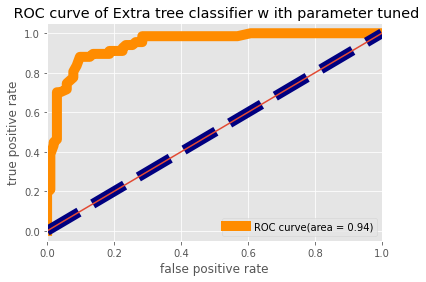

In [789]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title (" ROC curve of Extra tree classifier w ith parameter tuned")
plt.legend(loc="lower right")


plt.show()

#  area under the curve is 0.9435908691834944


In [790]:
import pickle
filename = "loan_application.pkl"
pickle.dump(et, open(filename,"wb"))